In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [2]:
df = pd.read_csv('data/agg_data.csv')

### Гистограмма "company - число вакансий (за весь период)": выявлеине компаний, пылясосящик рынок

In [3]:
df_c = df.copy()


def rep_dat(data):
    rep_str = data.split('-')
    if len(rep_str[0]) < 3:
        return f'{rep_str[2]}-{rep_str[1]}-{rep_str[1]}'[:10]
    else:
        return data[:10]


df_c['date_publish'] = df_c['date_publish'].apply(lambda x: rep_dat(x))
df_c['date_publish'] = pd.to_datetime(df_c['date_publish'], yearfirst=True)
df_c = df_c[df_c['date_publish'].dt.year == 2022]

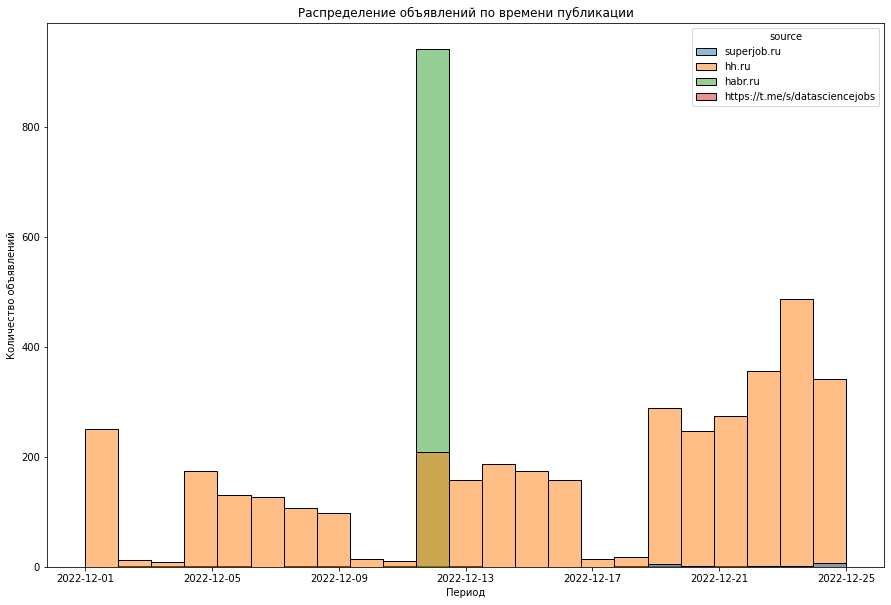

In [9]:
fig = plt.figure(figsize=(15,10))
ax = sns.histplot(data=df_c[df_c['date_publish'].dt.month > 11], x='date_publish', hue='source')
ax.set(xlabel='Период', ylabel='Количество объявлений', title='Распределение объявлений по времени публикации');


Смотеть распределение по вакансиям в дату смысла нет, все данные за декабрь-2022

### Гистограмма "топ-20 навыков": число упоминаний в techstack тех или иных ключевых слов

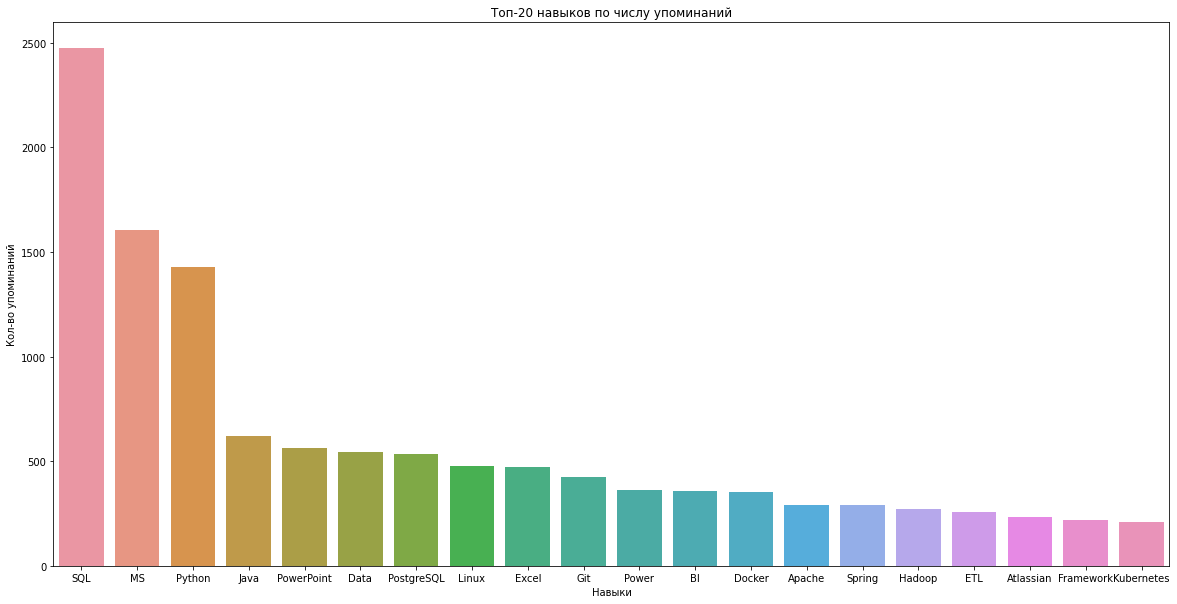

In [5]:
def str_to_list(x):
    lst = x.strip('"[]').split()
    return [el.strip("'',") for el in lst]

df_c['techstack'] = df_c['techstack'].apply(str_to_list)
most_common_position = df_c['techstack'].sum()
r = re.compile("[a-zA-Z]+")

most_common_position = [w for w in filter(r.match, most_common_position)]
most_common_position = Counter(most_common_position).most_common(20)
df_most_common = pd.DataFrame(most_common_position, columns=['Skills', 'Count'])

fig = plt.figure(figsize=(20, 10))
bar = sns.barplot(data=df_most_common, x='Skills', y='Count')
bar.set_title('Топ-20 навыков по числу упоминаний')
bar.set_xlabel('Навыки')
bar.set_ylabel('Кол-во упоминаний');


Можно выделить 3 наиболее популярных навыка - SQL, MS, Python. Это основные навыки для специалистов, далее идут более редкие навыки, в зависимости от специфики работ. 